# Tankmodell - vi fyller og tømmer tanken
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

Tidligere har vi laget en modell for en tank hvor det strømmer væske ut av et hull i bunnen av tanken. Nå skal vi utvide denne modellen sånn at den har en tilførsel av væske i toppen også. Se figuren nedenfor:

![Skisse av tanken](img/tank02.png)

Tanken har tverrsnitt $A=2 \ m^2$ over hele høyden til tanken. I toppen av tanken kommer det inn væske $q_{inn} = 0.05 \ m^3/s$ (50 liter i sekundet). I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $a=0,01 \ m^2$. Ved tiden $t=0$ er tanken fylt opp til høyden $h_0=4 \ m$. Hvordan vil høyden $h$ endres over tid, og når er tanken tom? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ m/s^2$.


La oss først definere de parametrene vi har fått oppgitt:

In [20]:
import math # vi trenger dette biblioteket senere

A = 2.00
a = 0.01
q_inn = 0.05
h0 = 4.00
g = 9.81

Nå setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det kommer væske inn i toppen av tanken samtidig som det strømmer væske ut i bunnen av tanken. Da har vi at:

$$ \frac{dV}{dt} = q_{inn} - q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer inn i tanken minus det som strømmer ut av tanken.

Mengden $q_{ut}$ som strømmer ut av tanken er gitt ved arealet $a$ til hullet og hastigheten $v$ på væskestrømmen ut av hullet: 

$$ q_{ut} = a \cdot v $$

Siden tverrsnittet A til tanken er konstant og volumet av væsken i tanken $V=A \cdot h$, kan vi nå skrive:

$$ A \frac{dh}{dt} = q_{inn} - a \cdot v$$

Fra fysikken vet vi at energien i systemet må være konservert. Væsken som strømmer ut av hullet i bunnen får farten fra høyden $h$ fra væskenivået i tanken. Den potensielle energien er gitt ved $mgh$, og den kinetiske energien til vannstrålen ut av hullet i bunnen er gitt ved $\frac{1}{2}mv^2$. For at energien skal være konservert, må vi da ha:

$$ \frac{1}{2}mv^2 = mgh $$

Vi kan forkorte bort massen:

$$ v^2 = 2gh $$
$$ v = \sqrt{2gh} = k \sqrt{h} $$

In [21]:
k = math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 4.4294469180700204


Nå kan vi sette inn uttrykket for $v$ i uttrykket for endring av volumet til væsken i tanken:

$$ A \frac{dh}{dt} = q_{inn} - a k \sqrt{h}$$

Uttrykket for endring av høyden over tid blir da:

$$ \frac{dh}{dt} = \frac{1}{A} q_{inn} - \frac{a}{A} k \sqrt{h}  $$

Vi bruker Eulers metode for å finne ut hva høyden $h$ er ved tiden $i+1$:

$$ \frac{h_{i+1} − h_i}{t_{i+1} − t_i} = \frac{1}{A} q_{inn} − \frac{a}{A}  k\sqrt{h_i} $$

$$ h_{i+1} = \frac{1}{A} q_{inn} − \frac{a}{A}  k\sqrt{h_i} \cdot (t_{i+1} − t_i) + h_i $$

Nå kan vi implementere Eulers metode i Python:

In [22]:
def euler(h, t, t_neste):
    '''Regner ut ny høyde i tanken vet tiden t_neste, gitt høyden ved tiden t. 
       Bruker globale variabler for innstrømmen til tanken, 
       og for areal av tank og hull i bunn av tanken.
    '''
    return (q_inn/A) - (a/A) * k * math.sqrt(h) * (t_neste - t) + h

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=5$).

t = 0 => h = 4.0 	 v = 8.86 	 qut = 0.0886
t = 5 => h = 3.8 	 v = 8.64 	 qut = 0.0864
t = 10 => h = 3.61 	 v = 8.42 	 qut = 0.0842
t = 15 => h = 3.43 	 v = 8.2 	 qut = 0.082
t = 20 => h = 3.25 	 v = 7.98 	 qut = 0.0798
t = 25 => h = 3.07 	 v = 7.76 	 qut = 0.0776
t = 30 => h = 2.9 	 v = 7.55 	 qut = 0.0755
t = 35 => h = 2.74 	 v = 7.33 	 qut = 0.0733
t = 40 => h = 2.58 	 v = 7.12 	 qut = 0.0712
t = 45 => h = 2.43 	 v = 6.9 	 qut = 0.069
t = 50 => h = 2.28 	 v = 6.69 	 qut = 0.0669
t = 55 => h = 2.14 	 v = 6.48 	 qut = 0.0648
t = 60 => h = 2.0 	 v = 6.27 	 qut = 0.0627
t = 65 => h = 1.87 	 v = 6.06 	 qut = 0.0606
t = 70 => h = 1.74 	 v = 5.85 	 qut = 0.0585
t = 75 => h = 1.62 	 v = 5.64 	 qut = 0.0564
t = 80 => h = 1.51 	 v = 5.44 	 qut = 0.0544
t = 85 => h = 1.4 	 v = 5.23 	 qut = 0.0523
t = 90 => h = 1.29 	 v = 5.03 	 qut = 0.0503
t = 95 => h = 1.19 	 v = 4.83 	 qut = 0.0483
t = 100 => h = 1.09 	 v = 4.63 	 qut = 0.0463
t = 105 => h = 1.0 	 v = 4.43 	 qut = 0.0443
t = 110 => h = 0.92 

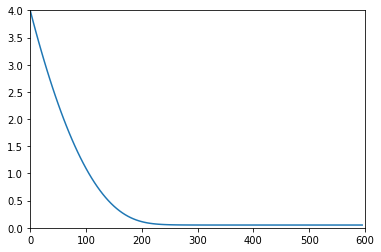

In [23]:
t = 0  # starttiden
dt = 5 # tidssteg i sekunder
h = h0 # starthøyden vår
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_lim = 600 # vi stopper beregningen etter 300 sekunder
t_hist = [] # Lagerplass for historiske tidspunkter
h_hist = [] # Lagerplass for historiske h-verdier
while h > h_lim and t < t_lim:
    t_neste = t + dt
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h = euler(h, t, t_neste)
    v = k * math.sqrt(h) # Hastigheten til væsken som strømmer ut av hullet
    q_ut = a * v # Mengden væske som strømmer ut av hullet
    print("t = {} => h = {} \t v = {} \t qut = {}".format(t, round(h,2), round(v,2), round(q_ut,4)))
    t_hist.append(t)
    h_hist.append(h)
    t = t_neste

import matplotlib.pyplot as plt
plt.plot(t_hist, h_hist)
plt.axis([0, 600, 0, 4])
plt.show()